In [49]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [50]:
import db
import numpy as np
import matplotlib.pyplot as plt
import locate
import scipy as sp

In [51]:
%sql sqlite:///schema/test.db

u'Connected: None@schema/test.db'

In [52]:
%matplotlib notebook
result = %sql select * from experiment
print result

result = %sql select experiment_id, array_id, mic_id, delay from mic
print result

result = %sql select * from array
print result

cur_experiment_id = 1

Done.
+----+------------+------+------+
| id |  datetime  |  x   |  y   |
+----+------------+------+------+
| 1  | 1487646469 | 3.0  | 3.0  |
| 2  | 1487646572 | 31.0 | 31.0 |
| 3  | 1487646719 | 31.0 | 31.0 |
| 4  | 1487646758 | 31.0 | 31.0 |
| 5  | 1487647083 | 31.0 | 31.0 |
| 6  | 1487647429 | 31.0 | 31.0 |
| 7  | 1487647612 | 31.0 | 31.0 |
| 8  | 1487647727 | 1.0  | 1.0  |
| 9  | 1487647909 | 18.0 | 18.0 |
+----+------------+------+------+
Done.
+---------------+----------+--------+----------+
| experiment_id | array_id | mic_id |  delay   |
+---------------+----------+--------+----------+
|       1       |    0     |   0    |   0.0    |
|       1       |    0     |   1    | -5688.0  |
|       1       |    0     |   2    | -11228.0 |
|       2       |    0     |   0    |   0.0    |
|       2       |    0     |   1    |  5969.0  |
|       2       |    0     |   2    |  291.0   |
|       3       |    0     |   0    |   0.0    |
|       3       |    0     |   1    |  5969.0  |
|      

In [53]:
result = %sql select data from mic where experiment_id = :cur_experiment_id

mic_1 = result[0][0]
mic_2 = result[1][0]
print np.array(mic_1)

# This is equivalent to what mic_1 is doing to fetch data
#mic_3 = db.get_mic_data(cur_experiment_id, 0, 0)

mic_3 = result[2][0]

Done.
[157 158 157 ..., 160 161 163]


(6692392480.8516121, -5688)


<IPython.core.display.Javascript object>


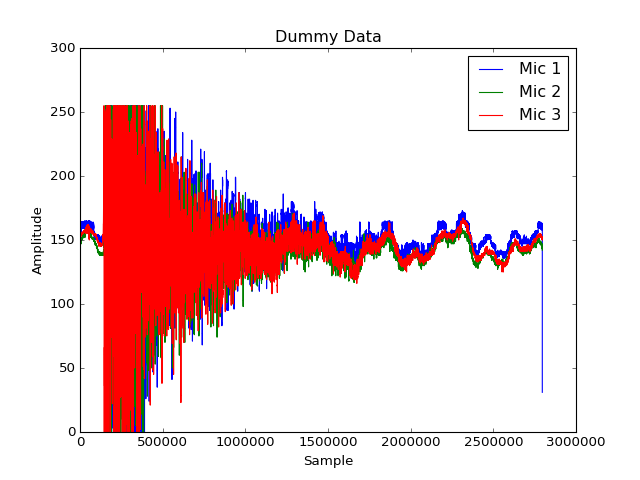

In [54]:
import matplotlib.pyplot as plt
print locate.xcorr(np.array(mic_1), np.array(mic_2))

plt.plot(sp.signal.medfilt(np.array(mic_1), 25), label='Mic 1', lw=1)
plt.plot(sp.signal.medfilt(np.array(mic_2), 25), label='Mic 2', lw=1)
plt.plot(sp.signal.medfilt(np.array(mic_3), 25), label='Mic 3', lw=1)
plt.legend()
plt.title('Dummy Data')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()